In [7]:
from numpy.ma.core import sqrt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats_basic import describe
from sklearn.preprocessing import MinMaxScaler
import os
import glob
from os.path import basename
from functools import reduce
from statsmodels.stats.contingency_tables import mcnemar


pd.set_option('max_row', 99999)
pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None) #display all columns from a dataframe

In [8]:


#Loading participants' answers to the entry survey
df_Entry = pd.read_excel ('EduVisEntry_ReasonScore.xlsx', sheet_name='Sheet1')
#df_Entry.info()
#display(df_Entry)


#Loading participants' answers to the exit survey
df_Exit = pd.read_excel ('EduVisExit_ReasonScore.xlsx', sheet_name='Sheet1')
#df_Exit = df_Exit.fillna('')
#display(df_Exit)


In [9]:
#I used df_Entry_Exit to run t-test, I later normalize this dataframe
df_Entry_Exit = pd.merge(df_Entry, df_Exit, how='inner', on= ['ParticipantID'])
#Text_Check_Merge_RemoveFirstTenPar = pd.merge(df_Text_NoNAN_RemoveFirstTenPar, df_Check_NoNAN_RemoveFirstTenPar, how='inner', on=["Participants"])

# I use df_Entry_Exit2 to run mcnemar test
df_Entry_Exit2 = df_Entry_Exit.copy()
# df_Entry_Exit.info()
#display(df_Entry_Exit2)

In [10]:
df_Avg_All_Online_InPerson = pd.DataFrame(columns = ['L1_Ent_Obstruction1_LF','L1_Ent_Success1_MF','L1_Ent_TooFar_LF','L1_Ent_Success2_UF','L1_Ent_Success3_MF',
                                  'L2_Ent_Angle1_LF','L2_Ent_Success1_UF','L2_Ent_TooBright_MF', 'L2_Ent_Success2_MF', 'L2_Ent_Success3_MF',
                                  'L3_Ent_Clutter1_MF','L3_Ent_Success1_MF','L3_Ent_Obstruction2_LF','L3_Ent_Success2_UF','L3_Ent_Success3_MF',
                                  'L4_Ent_TooClose_LF','L4_Ent_Success1_MF','L4_Ent_Clutter2_MF', 'L4_Ent_Success2_MF', 'L4_Ent_Success3_MF',
                                  'L5_Ent_TooDark_LF','L5_Ent_Success1_UF','L5_Ent_Angle2_LF','L5_Ent_Success2_MF','L5_Ent_Success3_UF',
                                  'avg_x',
                                  'L1_Ex_Obstruction1_LF','L1_Ex_Success1_MF','L1_Ex_TooFar_LF','L1_Ex_Success2_UF','L1_Ex_Success3_MF',
                                  'L2_Ex_Angle1_LF','L2_Ex_Success1_UF','L2_Ex_TooBright_MF', 'L2_Ex_Success2_MF', 'L2_Ex_Success3_MF',
                                  'L3_Ex_Clutter1_MF','L3_Ex_Success1_MF','L3_Ex_Obstruction2_LF','L3_Ex_Success2_UF','L3_Ex_Success3_MF',
                                  'L4_Ex_TooClose_LF','L4_Ex_Success1_MF','L4_Ex_Clutter2_MF', 'L4_Ex_Success2_MF', 'L4_Ex_Success3_MF',
                                  'L5_Ex_TooDark_LF','L5_Ex_Success1_UF','L5_Ex_Angle2_LF','L5_Ex_Success2_MF','L5_Ex_Success3_UF',
                                 'avg_y'], index = ['P_value'])


    
Avg_df_Avg_All_Online_InPerson_series = df_Entry_Exit.iloc[:, np.r_[:,1:53]].mean()
df_Avg_All_Online_InPerson = Avg_df_Avg_All_Online_InPerson_series.to_frame()
df_Avg_All_Online_InPerson = df_Avg_All_Online_InPerson.T
df_Avg_All_Online_InPerson.index=['Average']

display(df_Avg_All_Online_InPerson)

# courses = list(df_Avg_All_Online_InPerson.keys())
# values = list(df_Avg_All_Online_InPerson.to_numpy())
# #print(values)

,L1_Ent_Obstruction1_LF,L1_Ent_Success1_MF,L1_Ent_TooFar_LF,L1_Ent_Success2_UF,L1_Ent_Success3_MF,L2_Ent_Angle1_LF,L2_Ent_Success1_UF,L2_Ent_TooBright_MF,L2_Ent_Success2_MF,L2_Ent_Success3_MF,L3_Ent_Clutter1_MF,L3_Ent_Success1_MF,L3_Ent_Obstruction2_LF,L3_Ent_Success2_UF,L3_Ent_Success3_MF,L4_Ent_TooClose_LF,L4_Ent_Success1_MF,L4_Ent_Clutter2_MF,L4_Ent_Success2_MF,L4_Ent_Success3_MF,L5_Ent_TooDark_LF,L5_Ent_Success1_UF,L5_Ent_Angle2_LF,L5_Ent_Success2_MF,L5_Ent_Success3_UF,avg_x,L1_Ex_Obstruction1_LF,L1_Ex_Success1_MF,L1_Ex_TooFar_LF,L1_Ex_Success2_UF,L1_Ex_Success3_MF,L2_Ex_Angle1_LF,L2_Ex_Success1_UF,L2_Ex_TooBright_MF,L2_Ex_Success2_MF,L2_Ex_Success3_MF,L3_Ex_Clutter1_MF,L3_Ex_Success1_MF,L3_Ex_Obstruction2_LF,L3_Ex_Success2_UF,L3_Ex_Success3_MF,L4_Ex_TooClose_LF,L4_Ex_Success1_MF,L4_Ex_Clutter2_MF,L4_Ex_Success2_MF,L4_Ex_Success3_MF,L5_Ex_TooDark_LF,L5_Ex_Success1_UF,L5_Ex_Angle2_LF,L5_Ex_Success2_MF,L5_Ex_Success3_UF,avg_y
Average,0.9315,0.98225,0.769,1.0,0.95425,0.9785,0.925,0.9685,0.97525,0.967,0.95625,0.9835,0.896,0.925,0.97125,0.93275,0.9835,0.9575,1.0,0.9075,0.88075,0.975,0.82425,0.9835,0.95,0.95159,0.98275,0.868,0.92725,0.9,0.9125,0.917,0.925,0.9855,0.908,0.84275,0.948,0.967,0.9275,0.9,0.8655,0.89075,0.882,0.9645,0.9725,0.91225,0.96675,0.875,0.909,0.8845,0.925,0.92595


In [11]:
#Normalize the data to run t-test

column_names_to_normalize = ['L1_Ent_Obstruction1_LF','L1_Ent_Success1_MF','L1_Ent_TooFar_LF','L1_Ent_Success2_UF','L1_Ent_Success3_MF',
                                  'L2_Ent_Angle1_LF','L2_Ent_Success1_UF','L2_Ent_TooBright_MF', 'L2_Ent_Success2_MF', 'L2_Ent_Success3_MF',
                                  'L3_Ent_Clutter1_MF','L3_Ent_Success1_MF','L3_Ent_Obstruction2_LF','L3_Ent_Success2_UF','L3_Ent_Success3_MF',
                                  'L4_Ent_TooClose_LF','L4_Ent_Success1_MF','L4_Ent_Clutter2_MF', 'L4_Ent_Success2_MF', 'L4_Ent_Success3_MF',
                                  'L5_Ent_TooDark_LF','L5_Ent_Success1_UF','L5_Ent_Angle2_LF','L5_Ent_Success2_MF','L5_Ent_Success3_UF',
                                  'avg_x',
                                  'L1_Ex_Obstruction1_LF','L1_Ex_Success1_MF','L1_Ex_TooFar_LF','L1_Ex_Success2_UF','L1_Ex_Success3_MF',
                                  'L2_Ex_Angle1_LF','L2_Ex_Success1_UF','L2_Ex_TooBright_MF', 'L2_Ex_Success2_MF', 'L2_Ex_Success3_MF',
                                  'L3_Ex_Clutter1_MF','L3_Ex_Success1_MF','L3_Ex_Obstruction2_LF','L3_Ex_Success2_UF','L3_Ex_Success3_MF',
                                  'L4_Ex_TooClose_LF','L4_Ex_Success1_MF','L4_Ex_Clutter2_MF', 'L4_Ex_Success2_MF', 'L4_Ex_Success3_MF',
                                  'L5_Ex_TooDark_LF','L5_Ex_Success1_UF','L5_Ex_Angle2_LF','L5_Ex_Success2_MF','L5_Ex_Success3_UF',
                                 'avg_y']
x = df_Entry_Exit[column_names_to_normalize].values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_Entry_Exit_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_Entry_Exit.index)
df_Entry_Exit[column_names_to_normalize] = df_Entry_Exit_temp
display(df_Entry_Exit)

,ParticipantID,L1_Ent_Obstruction1_LF,L1_Ent_Success1_MF,L1_Ent_TooFar_LF,L1_Ent_Success2_UF,L1_Ent_Success3_MF,L2_Ent_Angle1_LF,L2_Ent_Success1_UF,L2_Ent_TooBright_MF,L2_Ent_Success2_MF,L2_Ent_Success3_MF,L3_Ent_Clutter1_MF,L3_Ent_Success1_MF,L3_Ent_Obstruction2_LF,L3_Ent_Success2_UF,L3_Ent_Success3_MF,L4_Ent_TooClose_LF,L4_Ent_Success1_MF,L4_Ent_Clutter2_MF,L4_Ent_Success2_MF,L4_Ent_Success3_MF,L5_Ent_TooDark_LF,L5_Ent_Success1_UF,L5_Ent_Angle2_LF,L5_Ent_Success2_MF,L5_Ent_Success3_UF,avg_x,L1_Ex_Obstruction1_LF,L1_Ex_Success1_MF,L1_Ex_TooFar_LF,L1_Ex_Success2_UF,L1_Ex_Success3_MF,L2_Ex_Angle1_LF,L2_Ex_Success1_UF,L2_Ex_TooBright_MF,L2_Ex_Success2_MF,L2_Ex_Success3_MF,L3_Ex_Clutter1_MF,L3_Ex_Success1_MF,L3_Ex_Obstruction2_LF,L3_Ex_Success2_UF,L3_Ex_Success3_MF,L4_Ex_TooClose_LF,L4_Ex_Success1_MF,L4_Ex_Clutter2_MF,L4_Ex_Success2_MF,L4_Ex_Success3_MF,L5_Ex_TooDark_LF,L5_Ex_Success1_UF,L5_Ex_Angle2_LF,L5_Ex_Success2_MF,L5_Ex_Success3_UF,avg_y
0,I_P1,1.00,1.000000,0.34,0.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,0.000000,1.0,0.500000,1.0,1.000000,1.00,1.0,0.424242,0.0,1.000000,1.00,1.0,1.00,1.0,1.0,0.806394,1.000000,1.0,1.00,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.500000,1.0,1.000000,1.0,1.000000,0.00,1.000000,0.131579,1.000000,1.000000,1.00,1.0,0.95,1.0,1.0,0.800467
1,I_P2,1.00,1.000000,1.00,0.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.0,1.000000,0.0,1.000000,1.00,1.0,0.00,1.0,1.0,0.822380,1.000000,1.0,0.67,1.0,0.424242,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.00,1.0,1.00,1.0,1.0,0.917153
2,I_P3,1.00,1.000000,1.00,0.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.0,1.000000,0.0,1.000000,1.00,0.0,0.95,0.0,1.0,0.696270,1.000000,1.0,1.00,0.0,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,0.000000,1.00,0.0,1.00,1.0,1.0,0.689615
3,I_P4,0.95,1.000000,0.00,0.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.0,0.500000,1.0,1.000000,1.00,1.0,1.000000,0.0,0.333333,1.00,1.0,1.00,1.0,1.0,0.637655,0.000000,1.0,1.00,1.0,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,0.00,1.000000,0.131579,1.000000,1.000000,1.00,1.0,0.00,1.0,1.0,0.676779
4,I_P5,1.00,1.000000,1.00,0.0,1.000000,1.000000,1.0,1.000000,1.0,0.0,1.000000,1.0,1.000000,1.0,1.000000,0.95,1.0,0.500000,0.0,1.000000,1.00,1.0,1.00,1.0,1.0,0.932504,0.886364,1.0,1.00,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.924242,1.0,1.000000,1.0,1.000000,0.95,1.000000,0.000000,1.000000,1.000000,1.00,1.0,0.95,1.0,1.0,0.932322
5,O_P1,1.00,1.000000,1.00,0.0,1.000000,0.000000,1.0,0.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.0,1.000000,0.0,1.000000,1.00,1.0,0.67,1.0,1.0,0.882771,1.000000,1.0,1.00,1.0,1.000000,0.500000,0.0,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,0.67,1.0,0.67,1.0,1.0,0.574096
6,O_P2,1.00,1.000000,1.00,0.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.0,1.000000,0.0,1.000000,1.00,1.0,0.95,1.0,1.0,0.991119,1.000000,1.0,1.00,1.0,0.848485,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,0.848485,1.00,1.0,0.95,1.0,1.0,0.970828
7,O_P3,1.00,1.000000,0.00,0.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.0,1.000000,0.0,1.000000,0.00,1.0,0.95,1.0,1.0,0.635879,1.000000,1.0,1.00,1.0,1.000000,0.924242,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.00,1.0,1.00,1.0,1.0,0.994166
8,I_P6,1.00,1.000000,0.95,0.0,0.696970,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.0,1.000000,0.0,0.696970,1.00,1.0,1.00,1.0,1.0,0.920071,1.000000,1.0,1.00,1.0,0.833333,1.000000,1.0,1.000000,1.000000,0.000000,0.924242,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.0000

In [ ]:
df_tTest = pd.DataFrame(columns = ['L1_Ent_Obstruction1_LF','L1_Ent_Success1_MF','L1_Ent_TooFar_LF','L1_Ent_Success2_UF','L1_Ent_Success3_MF',
                                  'L2_Ent_Angle1_LF','L2_Ent_Success1_UF','L2_Ent_TooBright_MF', 'L2_Ent_Success2_MF', 'L2_Ent_Success3_MF',
                                  'L3_Ent_Clutter1_MF','L3_Ent_Success1_MF','L3_Ent_Obstruction2_LF','L3_Ent_Success2_UF','L3_Ent_Success3_MF',
                                  'L4_Ent_TooClose_LF','L4_Ent_Success1_MF','L4_Ent_Clutter2_MF', 'L4_Ent_Success2_MF', 'L4_Ent_Success3_MF',
                                  'L5_Ent_TooDark_LF','L5_Ent_Success1_UF','L5_Ent_Angle2_LF','L5_Ent_Success2_MF','L5_Ent_Success3_UF'], index = ['P_value'])


    
df_tTest['L1_Ent_Obstruction1_LF'] = stats.ttest_rel(df_Entry_Exit['L1_Ent_Obstruction1_LF'], df_Entry_Exit['L1_Ex_Obstruction1_LF'])[1]
df_tTest['L1_Ent_Success1_MF'] = stats.ttest_rel(df_Entry_Exit['L1_Ent_Success1_MF'], df_Entry_Exit['L1_Ex_Success1_MF'])[1]
df_tTest['L1_Ent_TooFar_LF'] = stats.ttest_rel(df_Entry_Exit['L1_Ent_TooFar_LF'], df_Entry_Exit['L1_Ex_TooFar_LF'])[1]
df_tTest['L1_Ent_Success2_UF'] = stats.ttest_rel(df_Entry_Exit['L1_Ent_Success2_UF'], df_Entry_Exit['L1_Ex_Success2_UF'])[1]
df_tTest['L1_Ent_Success3_MF'] = stats.ttest_rel(df_Entry_Exit['L1_Ent_Success3_MF'], df_Entry_Exit['L1_Ex_Success3_MF'])[1]


df_tTest['L2_Ent_Angle1_LF'] = stats.ttest_rel(df_Entry_Exit['L2_Ent_Angle1_LF'], df_Entry_Exit['L2_Ex_Angle1_LF'])[1]
df_tTest['L2_Ent_Success1_UF'] = stats.ttest_rel(df_Entry_Exit['L2_Ent_Success1_UF'], df_Entry_Exit['L2_Ex_Success1_UF'])[1]
df_tTest['L2_Ent_TooBright_MF'] = stats.ttest_rel(df_Entry_Exit['L2_Ent_TooBright_MF'], df_Entry_Exit['L2_Ex_TooBright_MF'])[1]
df_tTest['L2_Ent_Success2_MF'] = stats.ttest_rel(df_Entry_Exit['L2_Ent_Success2_MF'], df_Entry_Exit['L2_Ex_Success2_MF'])[1]
df_tTest['L2_Ent_Success3_MF'] = stats.ttest_rel(df_Entry_Exit['L2_Ent_Success3_MF'], df_Entry_Exit['L2_Ex_Success3_MF'])[1]


df_tTest['L3_Ent_Clutter1_MF'] = stats.ttest_rel(df_Entry_Exit['L3_Ent_Clutter1_MF'], df_Entry_Exit['L3_Ex_Clutter1_MF'])[1]
df_tTest['L3_Ent_Success1_MF'] = stats.ttest_rel(df_Entry_Exit['L3_Ent_Success1_MF'], df_Entry_Exit['L3_Ex_Success1_MF'])[1]
df_tTest['L3_Ent_Obstruction2_LF'] = stats.ttest_rel(df_Entry_Exit['L3_Ent_Obstruction2_LF'], df_Entry_Exit['L3_Ex_Obstruction2_LF'])[1]
df_tTest['L3_Ent_Success2_UF'] = stats.ttest_rel(df_Entry_Exit['L3_Ent_Success2_UF'], df_Entry_Exit['L3_Ex_Success2_UF'])[1]
df_tTest['L3_Ent_Success3_MF'] = stats.ttest_rel(df_Entry_Exit['L3_Ent_Success3_MF'], df_Entry_Exit['L3_Ex_Success3_MF'])[1]


df_tTest['L4_Ent_TooClose_LF'] = stats.ttest_rel(df_Entry_Exit['L4_Ent_TooClose_LF'], df_Entry_Exit['L4_Ex_TooClose_LF'])[1]
df_tTest['L4_Ent_Success1_MF'] = stats.ttest_rel(df_Entry_Exit['L4_Ent_Success1_MF'], df_Entry_Exit['L4_Ex_Success1_MF'])[1]
df_tTest['L4_Ent_Clutter2_MF'] = stats.ttest_rel(df_Entry_Exit['L4_Ent_Clutter2_MF'], df_Entry_Exit['L4_Ex_Clutter2_MF'])[1]
df_tTest['L4_Ent_Success2_MF'] = stats.ttest_rel(df_Entry_Exit['L4_Ent_Success2_MF'], df_Entry_Exit['L4_Ex_Success2_MF'])[1]
df_tTest['L4_Ent_Success3_MF'] = stats.ttest_rel(df_Entry_Exit['L4_Ent_Success3_MF'], df_Entry_Exit['L4_Ex_Success3_MF'])[1]

df_tTest['L5_Ent_TooDark_LF'] = stats.ttest_rel(df_Entry_Exit['L5_Ent_TooDark_LF'], df_Entry_Exit['L5_Ex_TooDark_LF'])[1]
df_tTest['L5_Ent_Success1_UF'] = stats.ttest_rel(df_Entry_Exit['L5_Ent_Success1_UF'], df_Entry_Exit['L5_Ex_Success1_UF'])[1]
df_tTest['L5_Ent_Angle2_LF'] = stats.ttest_rel(df_Entry_Exit['L5_Ent_Angle2_LF'], df_Entry_Exit['L5_Ex_Angle2_LF'])[1]
df_tTest['L5_Ent_Success2_MF'] = stats.ttest_rel(df_Entry_Exit['L5_Ent_Success2_MF'], df_Entry_Exit['L5_Ex_Success2_MF'])[1]
df_tTest['L5_Ent_Success3_UF'] = stats.ttest_rel(df_Entry_Exit['L5_Ent_Success3_UF'], df_Entry_Exit['L5_Ex_Success3_UF'])[1]


# stats.ttest_rel(df_Entry_Exit['L1_Ent_Obstruction1_LF'], df_Entry_Exit['L1_Ent_Obstruction1_LF'])[1]
display(df_tTest)


In [ ]:
df_tTest = pd.DataFrame(columns = ['L1_Ent_Obstruction1_LF','L1_Ent_Success1_MF','L1_Ent_TooFar_LF','L1_Ent_Success2_UF','L1_Ent_Success3_MF',
                                  'L2_Ent_Angle1_LF','L2_Ent_Success1_UF','L2_Ent_TooBright_MF', 'L2_Ent_Success2_MF', 'L2_Ent_Success3_MF',
                                  'L3_Ent_Clutter1_MF','L3_Ent_Success1_MF','L3_Ent_Obstruction2_LF','L3_Ent_Success2_UF','L3_Ent_Success3_MF',
                                  'L4_Ent_TooClose_LF','L4_Ent_Success1_MF','L4_Ent_Clutter2_MF', 'L4_Ent_Success2_MF', 'L4_Ent_Success3_MF',
                                  'L5_Ent_TooDark_LF','L5_Ent_Success1_UF','L5_Ent_Angle2_LF','L5_Ent_Success2_MF','L5_Ent_Success3_UF'], index = ['P_value'])



In [12]:
temp_all = []
for idx, row in df_Entry_Exit.iterrows():
  temp = []
  for group in range(5):
    temp += stats.ttest_rel(df_Entry_Exit[25*group], df_Entry_Exit[(group*25)+26])[1]

KeyError: ignored

In [ ]:
def autolabel(rectangle_group):
	for rect in rectangle_group:
		height = rect.get_height()

		ax.annotate(str(height),
			xy = (rect.get_x() + rect.get_width()/2,height+0.01),
			ha = 'center',
			xytext = (0,3),textcoords = 'offset points',
			color = 'grey')

labels      = ['Obstruction1','Obstruction2','TooFar','TooClose', 'Angle1', 'Angle2', 'TooBright', 'TooDark', 'Clutter1', 'Clutter2']
# #Original values
# pre         = [ 0.948       , 0.89600      , 0.78550,  0.93275,   0.98675,  0.82425, 0.99050,     0.89175,  0.96450,  0.97400 ]
# post        = [  0.98275     , 0.93575     , 0.92725, 0.92375,   0.95000,  0.90900,  0.98550,     0.96675,  0.96450,  0.96450 ]

#Rounded values
pre         = [ 0.95       , 0.90      , 0.79,  0.93,   0.99,  0.82, 0.99,     0.89,  0.97,  0.97  ]
post        = [  0.98     , 0.94       , 0.93, 0.92,   0.95,  0.91,  0.99,     0.97,  0.97,  0.97    ]



width = 0.3
x_pre  = [x - width for x in range(len(pre))]
x_post = [x for x in range(len(post))]

fig,ax = plt.subplots()

rect1 = ax.bar(x_pre, pre,width, label = 'Pre',color = 'darkslategray')
rect2 = ax.bar(x_post,post,width,label = 'post',color = 'limegreen')


ax.set_title('The hardware market')
ax.set_ylabel('Total sales (in millions)')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
autolabel(rect1)
autolabel(rect2)

plt.xticks(x_pre, labels, rotation=90)

fig.subplots_adjust(hspace = 0.5)

plt.show()


In [ ]:
#store in-person participants' responses in a separate dataframe
In_person_df= df_Entry_Exit[df_Entry_Exit.ParticipantID.str.startswith('I')]
In_person_df= In_person_df.fillna('')
#display(In_person_df)

#store online participants' responses in a separate dataframe
Online_df= df_Entry_Exit[df_Entry_Exit.ParticipantID.str.startswith('O')]
Online_df= Online_df.fillna('')
#Online_df.info()

In [ ]:
df_tTest_Online = pd.DataFrame(columns = ['L1_Obstruction1_LF','L1_Success1_MF','L1_TooFar_LF','L1_Success2_UF','L1_Success3_MF',
                                  'L2_Angle1_LF','L2_Success1_UF','L2_TooBright_MF', 'L2_Success2_MF', 'L2_Success3_MF',
                                  'L3_Clutter1_MF','L3_Success1_MF','L3_Obstruction2_LF','L3_Success2_UF','L3_Success3_MF',
                                  'L4_TooClose_LF','L4_Success1_MF','L4_Clutter2_MF', 'L4_Success2_MF', 'L4_Success3_MF',
                                  'L5_TooDark_LF','L5_Success1_UF','L5_Angle2_LF','L5_Success2_MF','L5_Success3_UF'], index = ['P_value'])


    
df_tTest_Online['L1_Obstruction1_LF'] = stats.ttest_rel(Online_df['L1_Ent_Obstruction1_LF'], Online_df['L1_Ex_Obstruction1_LF'])[1]
df_tTest_Online['L1_Success1_MF'] = stats.ttest_rel(Online_df['L1_Ent_Success1_MF'], Online_df['L1_Ex_Success1_MF'])[1]
df_tTest_Online['L1_TooFar_LF'] = stats.ttest_rel(Online_df['L1_Ent_TooFar_LF'], Online_df['L1_Ex_TooFar_LF'])[1]
df_tTest_Online['L1_Success2_UF'] = stats.ttest_rel(Online_df['L1_Ent_Success2_UF'], Online_df['L1_Ex_Success2_UF'])[1]
df_tTest_Online['L1_Success3_MF'] = stats.ttest_rel(Online_df['L1_Ent_Success3_MF'], Online_df['L1_Ex_Success3_MF'])[1]


df_tTest_Online['L2_Angle1_LF'] = stats.ttest_rel(Online_df['L2_Ent_Angle1_LF'], Online_df['L2_Ex_Angle1_LF'])[1]
df_tTest_Online['L2_Success1_UF'] = stats.ttest_rel(Online_df['L2_Ent_Success1_UF'], Online_df['L2_Ex_Success1_UF'])[1]
df_tTest_Online['L2_TooBright_MF'] = stats.ttest_rel(Online_df['L2_Ent_TooBright_MF'], Online_df['L2_Ex_TooBright_MF'])[1]
df_tTest_Online['L2_Success2_MF'] = stats.ttest_rel(Online_df['L2_Ent_Success2_MF'], Online_df['L2_Ex_Success2_MF'])[1]
df_tTest_Online['L2_Success3_MF'] = stats.ttest_rel(Online_df['L2_Ent_Success3_MF'], Online_df['L2_Ex_Success3_MF'])[1]


df_tTest_Online['L3_Clutter1_MF'] = stats.ttest_rel(Online_df['L3_Ent_Clutter1_MF'], Online_df['L3_Ex_Clutter1_MF'])[1]
df_tTest_Online['L3_Success1_MF'] = stats.ttest_rel(Online_df['L3_Ent_Success1_MF'], Online_df['L3_Ex_Success1_MF'])[1]
df_tTest_Online['L3_Obstruction2_LF'] = stats.ttest_rel(Online_df['L3_Ent_Obstruction2_LF'], Online_df['L3_Ex_Obstruction2_LF'])[1]
df_tTest_Online['L3_Success2_UF'] = stats.ttest_rel(Online_df['L3_Ent_Success2_UF'], Online_df['L3_Ex_Success2_UF'])[1]
df_tTest_Online['L3_Success3_MF'] = stats.ttest_rel(Online_df['L3_Ent_Success3_MF'], Online_df['L3_Ex_Success3_MF'])[1]


df_tTest_Online['L4_TooClose_LF'] = stats.ttest_rel(Online_df['L4_Ent_TooClose_LF'], Online_df['L4_Ex_TooClose_LF'])[1]
df_tTest_Online['L4_Success1_MF'] = stats.ttest_rel(Online_df['L4_Ent_Success1_MF'], Online_df['L4_Ex_Success1_MF'])[1]
df_tTest_Online['L4_Clutter2_MF'] = stats.ttest_rel(Online_df['L4_Ent_Clutter2_MF'], Online_df['L4_Ex_Clutter2_MF'])[1]
df_tTest_Online['L4_Success2_MF'] = stats.ttest_rel(Online_df['L4_Ent_Success2_MF'], Online_df['L4_Ex_Success2_MF'])[1]
df_tTest_Online['L4_Success3_MF'] = stats.ttest_rel(Online_df['L4_Ent_Success3_MF'], Online_df['L4_Ex_Success3_MF'])[1]

df_tTest_Online['L5_TooDark_LF'] = stats.ttest_rel(Online_df['L5_Ent_TooDark_LF'], Online_df['L5_Ex_TooDark_LF'])[1]
df_tTest_Online['L5_Success1_UF'] = stats.ttest_rel(Online_df['L5_Ent_Success1_UF'], Online_df['L5_Ex_Success1_UF'])[1]
df_tTest_Online['L5_Angle2_LF'] = stats.ttest_rel(Online_df['L5_Ent_Angle2_LF'], Online_df['L5_Ex_Angle2_LF'])[1]
df_tTest_Online['L5_Success2_MF'] = stats.ttest_rel(Online_df['L5_Ent_Success2_MF'], Online_df['L5_Ex_Success2_MF'])[1]
df_tTest_Online['L5_Success3_UF'] = stats.ttest_rel(Online_df['L5_Ent_Success3_UF'], Online_df['L5_Ex_Success3_UF'])[1]


display(df_tTest_Online)

In [ ]:
df_tTest_InPerson = pd.DataFrame(columns = ['L1_Obstruction1_LF','L1_Success1_MF','L1_TooFar_LF','L1_Success2_UF','L1_Success3_MF',
                                  'L2_Angle1_LF','L2_Success1_UF','L2_TooBright_MF', 'L2_Success2_MF', 'L2_Success3_MF',
                                  'L3_Clutter1_MF','L3_Success1_MF','L3_Obstruction2_LF','L3_Success2_UF','L3_Success3_MF',
                                  'L4_TooClose_LF','L4_Success1_MF','L4_Clutter2_MF', 'L4_Success2_MF', 'L4_Success3_MF',
                                  'L5_TooDark_LF','L5_Success1_UF','L5_Angle2_LF','L5_Success2_MF','L5_Success3_UF'], index = ['P_value'])


temp_all = []
for idx, row in df
    
df_tTest_InPerson['L1_Obstruction1_LF'] = stats.ttest_rel(In_person_df['L1_Ent_Obstruction1_LF'], In_person_df['L1_Ex_Obstruction1_LF'])[1]
df_tTest_InPerson['L1_Success1_MF'] = stats.ttest_rel(In_person_df['L1_Ent_Success1_MF'], In_person_df['L1_Ex_Success1_MF'])[1]
df_tTest_InPerson['L1_TooFar_LF'] = stats.ttest_rel(In_person_df['L1_Ent_TooFar_LF'], In_person_df['L1_Ex_TooFar_LF'])[1]
df_tTest_InPerson['L1_Success2_UF'] = stats.ttest_rel(In_person_df['L1_Ent_Success2_UF'], In_person_df['L1_Ex_Success2_UF'])[1]
df_tTest_InPerson['L1_Success3_MF'] = stats.ttest_rel(In_person_df['L1_Ent_Success3_MF'], In_person_df['L1_Ex_Success3_MF'])[1]


df_tTest_InPerson['L2_Angle1_LF'] = stats.ttest_rel(In_person_df['L2_Ent_Angle1_LF'], In_person_df['L2_Ex_Angle1_LF'])[1]
df_tTest_InPerson['L2_Success1_UF'] = stats.ttest_rel(In_person_df['L2_Ent_Success1_UF'], In_person_df['L2_Ex_Success1_UF'])[1]
df_tTest_InPerson['L2_TooBright_MF'] = stats.ttest_rel(In_person_df['L2_Ent_TooBright_MF'], In_person_df['L2_Ex_TooBright_MF'])[1]
df_tTest_InPerson['L2_Success2_MF'] = stats.ttest_rel(In_person_df['L2_Ent_Success2_MF'], In_person_df['L2_Ex_Success2_MF'])[1]
df_tTest_InPerson['L2_Success3_MF'] = stats.ttest_rel(In_person_df['L2_Ent_Success3_MF'], In_person_df['L2_Ex_Success3_MF'])[1]


df_tTest_InPerson['L3_Clutter1_MF'] = stats.ttest_rel(In_person_df['L3_Ent_Clutter1_MF'], In_person_df['L3_Ex_Clutter1_MF'])[1]
df_tTest_InPerson['L3_Success1_MF'] = stats.ttest_rel(In_person_df['L3_Ent_Success1_MF'], In_person_df['L3_Ex_Success1_MF'])[1]
df_tTest_InPerson['L3_Obstruction2_LF'] = stats.ttest_rel(In_person_df['L3_Ent_Obstruction2_LF'], In_person_df['L3_Ex_Obstruction2_LF'])[1]
df_tTest_InPerson['L3_Success2_UF'] = stats.ttest_rel(In_person_df['L3_Ent_Success2_UF'], In_person_df['L3_Ex_Success2_UF'])[1]
df_tTest_InPerson['L3_Success3_MF'] = stats.ttest_rel(In_person_df['L3_Ent_Success3_MF'], In_person_df['L3_Ex_Success3_MF'])[1]


df_tTest_InPerson['L4_TooClose_LF'] = stats.ttest_rel(In_person_df['L4_Ent_TooClose_LF'], In_person_df['L4_Ex_TooClose_LF'])[1]
df_tTest_InPerson['L4_Success1_MF'] = stats.ttest_rel(In_person_df['L4_Ent_Success1_MF'], In_person_df['L4_Ex_Success1_MF'])[1]
df_tTest_InPerson['L4_Clutter2_MF'] = stats.ttest_rel(In_person_df['L4_Ent_Clutter2_MF'], In_person_df['L4_Ex_Clutter2_MF'])[1]
df_tTest_InPerson['L4_Success2_MF'] = stats.ttest_rel(In_person_df['L4_Ent_Success2_MF'], In_person_df['L4_Ex_Success2_MF'])[1]
df_tTest_InPerson['L4_Success3_MF'] = stats.ttest_rel(In_person_df['L4_Ent_Success3_MF'], In_person_df['L4_Ex_Success3_MF'])[1]

df_tTest_InPerson['L5_TooDark_LF'] = stats.ttest_rel(In_person_df['L5_Ent_TooDark_LF'], In_person_df['L5_Ex_TooDark_LF'])[1]
df_tTest_InPerson['L5_Success1_UF'] = stats.ttest_rel(In_person_df['L5_Ent_Success1_UF'], In_person_df['L5_Ex_Success1_UF'])[1]
df_tTest_InPerson['L5_Angle2_LF'] = stats.ttest_rel(In_person_df['L5_Ent_Angle2_LF'], In_person_df['L5_Ex_Angle2_LF'])[1]
df_tTest_InPerson['L5_Success2_MF'] = stats.ttest_rel(In_person_df['L5_Ent_Success2_MF'], In_person_df['L5_Ex_Success2_MF'])[1]
df_tTest_InPerson['L5_Success3_UF'] = stats.ttest_rel(In_person_df['L5_Ent_Success3_UF'], In_person_df['L5_Ex_Success3_UF'])[1]


# stats.ttest_rel(df_Entry_Exit['L1_Ent_Obstruction1_LF'], df_Entry_Exit['L1_Ent_Obstruction1_LF'])[1]
display(df_tTest_InPerson)

,L1_Obstruction1_LF,L1_Success1_MF,L1_TooFar_LF,L1_Success2_UF,L1_Success3_MF,L2_Angle1_LF,L2_Success1_UF,L2_TooBright_MF,L2_Success2_MF,L2_Success3_MF,L3_Clutter1_MF,L3_Success1_MF,L3_Obstruction2_LF,L3_Success2_UF,L3_Success3_MF,L4_TooClose_LF,L4_Success1_MF,L4_Clutter2_MF,L4_Success2_MF,L4_Success3_MF,L5_TooDark_LF,L5_Success1_UF,L5_Angle2_LF,L5_Success2_MF,L5_Success3_UF
P_value,0.824279,0.180293,0.045375,1.131833e-11,0.125143,0.558054,1.0,0.447582,0.329257,0.246569,0.205958,0.576382,0.166847,0.162298,0.435164,0.33692,0.162298,0.658599,4.236814e-13,0.656344,0.845921,0.162298,0.278416,1.0,0.329257


In [ ]:
display(df_Entry_Exit2)

#store in-person participants' responses in a separate dataframe
In_person_df_Not_Normalized= df_Entry_Exit2[df_Entry_Exit2.ParticipantID.str.startswith('I')]

#display(In_person_df)

#store online participants' responses in a separate dataframe
Online_df_Not_Normalized= df_Entry_Exit2[df_Entry_Exit2.ParticipantID.str.startswith('O')]
display(Online_df)

,ParticipantID,L1_Ent_Obstruction1_LF,L1_Ent_Success1_MF,L1_Ent_TooFar_LF,L1_Ent_Success2_UF,L1_Ent_Success3_MF,L2_Ent_Angle1_LF,L2_Ent_Success1_UF,L2_Ent_TooBright_MF,L2_Ent_Success2_MF,L2_Ent_Success3_MF,L3_Ent_Clutter1_MF,L3_Ent_Success1_MF,L3_Ent_Obstruction2_LF,L3_Ent_Success2_UF,L3_Ent_Success3_MF,L4_Ent_TooClose_LF,L4_Ent_Success1_MF,L4_Ent_Clutter2_MF,L4_Ent_Success2_MF,L4_Ent_Success3_MF,L5_Ent_TooDark_LF,L5_Ent_Success1_UF,L5_Ent_Angle2_LF,L5_Ent_Success2_MF,L5_Ent_Success3_UF,avg_x,L1_Ex_Obstruction1_LF,L1_Ex_Success1_MF,L1_Ex_TooFar_LF,L1_Ex_Success2_UF,L1_Ex_Success3_MF,L2_Ex_Angle1_LF,L2_Ex_Success1_UF,L2_Ex_TooBright_MF,L2_Ex_Success2_MF,L2_Ex_Success3_MF,L3_Ex_Clutter1_MF,L3_Ex_Success1_MF,L3_Ex_Obstruction2_LF,L3_Ex_Success2_UF,L3_Ex_Success3_MF,L4_Ex_TooClose_LF,L4_Ex_Success1_MF,L4_Ex_Clutter2_MF,L4_Ex_Success2_MF,L4_Ex_Success3_MF,L5_Ex_TooDark_LF,L5_Ex_Success1_UF,L5_Ex_Angle2_LF,L5_Ex_Success2_MF,L5_Ex_Success3_UF,avg_y
0,I_P1,1.00,1.00,0.34,1.0,1.00,1.00,1.0,1.00,1.00,1.00,0.62,1.00,0.67,1.0,1.00,1.00,1.00,0.62,1.0,1.00,1.00,1.0,1.00,1.00,1.0,0.9564,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,0.67,1.00,1.00,1.0,1.00,0.00,1.00,0.67,1.00,1.00,1.00,1.0,0.95,1.00,1.0,0.9316
1,I_P2,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0,0.00,1.00,1.0,0.9600,1.00,1.00,0.67,1.0,0.62,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0,0.9716
2,I_P3,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,0.0,0.95,0.34,1.0,0.9316,1.00,1.00,1.00,0.0,1.00,1.00,1.0,1.00,1.00,0.34,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.34,1.00,0.0,1.00,1.00,1.0,0.8936
3,I_P4,0.95,1.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,0.34,0.67,1.0,1.00,1.00,1.00,1.00,1.0,0.56,1.00,1.0,1.00,1.00,1.0,0.9184,0.56,1.00,1.00,1.0,0.34,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,0.00,1.00,0.67,1.00,1.00,1.00,1.0,0.00,1.00,1.0,0.8892
4,I_P5,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,0.34,1.00,1.00,1.00,1.0,1.00,0.95,1.00,0.67,1.0,1.00,1.00,1.0,1.00,1.00,1.0,0.9848,0.95,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,0.95,1.00,1.00,1.0,1.00,0.95,1.00,0.62,1.00,1.00,1.00,1.0,0.95,1.00,1.0,0.9768
5,O_P1,1.00,1.00,1.00,1.0,1.00,0.67,1.0,0.56,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0,0.67,1.00,1.0,0.9736,1.00,1.00,1.00,1.0,1.00,0.67,0.0,1.00,1.00,1.00,1.00,1.00,0.34,0.0,1.00,1.00,1.00,1.00,1.00,1.00,0.67,1.0,0.67,1.00,1.0,0.8540
6,O_P2,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0,0.95,1.00,1.0,0.9980,1.00,1.00,1.00,1.0,0.90,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.90,1.00,1.0,0.95,1.00,1.0,0.9900
7,O_P3,1.00,1.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,0.00,1.0,0.95,1.00,1.0,0.9180,1.00,1.00,1.00,1.0,1.00,0.95,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0,0.9980
8,I_P6,1.00,1.00,0.95,1.0,0.80,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,0.80,1.00,1.0,1.00,1.00,1.0,0.9820,1.00,1.00,1.00,1.0,0.89,1.00,1.0,1.00,1.00,0.34,0.95,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.89,1.00,1.0,1.00,1.00,1.0,0.9628
9,I_P7,0.34,1.00,1.00,1.0,1.00,0.95,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,0.56,1.0,1.00,1.00,1.0,0.9980,1.00,1.00,1.00,1.0,1.00,0.34,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,0.62,1.00,1.0,0.9848


,ParticipantID,L1_Ent_Obstruction1_LF,L1_Ent_Success1_MF,L1_Ent_TooFar_LF,L1_Ent_Success2_UF,L1_Ent_Success3_MF,L2_Ent_Angle1_LF,L2_Ent_Success1_UF,L2_Ent_TooBright_MF,L2_Ent_Success2_MF,L2_Ent_Success3_MF,L3_Ent_Clutter1_MF,L3_Ent_Success1_MF,L3_Ent_Obstruction2_LF,L3_Ent_Success2_UF,L3_Ent_Success3_MF,L4_Ent_TooClose_LF,L4_Ent_Success1_MF,L4_Ent_Clutter2_MF,L4_Ent_Success2_MF,L4_Ent_Success3_MF,L5_Ent_TooDark_LF,L5_Ent_Success1_UF,L5_Ent_Angle2_LF,L5_Ent_Success2_MF,L5_Ent_Success3_UF,avg_x,L1_Ex_Obstruction1_LF,L1_Ex_Success1_MF,L1_Ex_TooFar_LF,L1_Ex_Success2_UF,L1_Ex_Success3_MF,L2_Ex_Angle1_LF,L2_Ex_Success1_UF,L2_Ex_TooBright_MF,L2_Ex_Success2_MF,L2_Ex_Success3_MF,L3_Ex_Clutter1_MF,L3_Ex_Success1_MF,L3_Ex_Obstruction2_LF,L3_Ex_Success2_UF,L3_Ex_Success3_MF,L4_Ex_TooClose_LF,L4_Ex_Success1_MF,L4_Ex_Clutter2_MF,L4_Ex_Success2_MF,L4_Ex_Success3_MF,L5_Ex_TooDark_LF,L5_Ex_Success1_UF,L5_Ex_Angle2_LF,L5_Ex_Success2_MF,L5_Ex_Success3_UF,avg_y
5,O_P1,1.00,1.0,1.00,0.0,1.0,0.000000,1.0,0.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.00,1.0,1.0,0.0,1.000000,1.0,1.0,0.67,1.0,1.0,0.882771,1.000000,1.0,1.00,1.0,1.000000,0.500000,0.0,1.000000,1.000000,1.000000,1.0,1.0,0.000000,0.0,1.000000,1.00,1.000000,1.0,1.0,1.000000,0.67,1.0,0.67,1.0,1.0,0.574096
6,O_P2,1.00,1.0,1.00,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.00,1.0,1.0,0.0,1.000000,1.0,1.0,0.95,1.0,1.0,0.991119,1.000000,1.0,1.00,1.0,0.848485,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.0,1.0,0.848485,1.00,1.0,0.95,1.0,1.0,0.970828
7,O_P3,1.00,1.0,0.00,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.00,1.0,1.0,0.0,1.000000,0.0,1.0,0.95,1.0,1.0,0.635879,1.000000,1.0,1.00,1.0,1.000000,0.924242,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.0,1.0,1.000000,1.00,1.0,1.00,1.0,1.0,0.994166
13,O_P5,1.00,1.0,1.00,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.00,1.0,1.0,0.0,0.848485,1.0,1.0,0.95,1.0,1.0,0.973357,1.000000,1.0,1.00,1.0,0.848485,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.0,1.0,0.848485,1.00,1.0,0.67,1.0,1.0,0.938156
15,O_P6,1.00,0.0,1.00,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,0.500000,1.0,1.0,1.00,1.0,1.0,0.0,1.000000,1.0,1.0,1.00,1.0,1.0,0.941385,1.000000,1.0,1.00,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.0,1.0,1.000000,1.0,0.000000,1.00,0.000000,1.0,1.0,1.000000,1.00,1.0,1.00,0.0,1.0,0.691949
16,O_P7,1.00,1.0,1.00,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,0.000000,1.0,1.0,1.00,1.0,1.0,0.0,0.000000,1.0,1.0,1.00,1.0,1.0,0.882771,1.000000,0.0,0.95,0.0,0.848485,0.924242,1.0,0.848485,0.000000,0.000000,0.5,1.0,1.000000,1.0,0.000000,1.00,0.000000,1.0,1.0,0.848485,1.00,0.0,1.00,1.0,1.0,0.340723
17,O_P8,0.56,1.0,1.00,0.0,0.0,1.000000,1.0,0.000000,1.0,1.0,1.000000,1.0,0.500000,1.0,1.0,1.00,1.0,1.0,0.0,1.000000,1.0,1.0,1.00,1.0,1.0,0.863233,0.886364,1.0,1.00,1.0,0.833333,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.0,1.0,0.833333,1.00,1.0,1.00,1.0,1.0,0.968495
18,O_P9,0.56,1.0,1.00,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,0.00,1.0,1.0,0.0,1.000000,1.0,1.0,0.67,1.0,1.0,0.685613,1.000000,1.0,0.67,1.0,1.000000,0.424242,1.0,1.000000,1.000000,1.000000,1.0,1.0,0.500000,1.0,1.000000,0.00,1.000000,1.0,1.0,1.000000,1.00,1.0,1.00,1.0,1.0,0.800467
19,O_P10,1.00,1.0,1.00,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,0.333333,1.0,1.0,1.00,0.0,1.0,0.0,1.000000,1.0,1.0,0.34,1.0,1.0,0.804618,1.000000,1.0,1.00,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.0,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.0,1.0,1.000000,1.00,1.0,0.00,1.0,1.0,0.883314
20,O_P11,1.00,1.0,0.00,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.00,1.0,1.0,0.0,1.000000,0.0,1.0,1.00,1.0,1.0,0.644760,1.000000,1.0,1.00,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.0

In [ ]:
df_Avg_InPerson = pd.DataFrame(columns = ['L1_Ent_Obstruction1_LF','L1_Ent_Success1_MF','L1_Ent_TooFar_LF','L1_Ent_Success2_UF','L1_Ent_Success3_MF',
                                  'L2_Ent_Angle1_LF','L2_Ent_Success1_UF','L2_Ent_TooBright_MF', 'L2_Ent_Success2_MF', 'L2_Ent_Success3_MF',
                                  'L3_Ent_Clutter1_MF','L3_Ent_Success1_MF','L3_Ent_Obstruction2_LF','L3_Ent_Success2_UF','L3_Ent_Success3_MF',
                                  'L4_Ent_TooClose_LF','L4_Ent_Success1_MF','L4_Ent_Clutter2_MF', 'L4_Ent_Success2_MF', 'L4_Ent_Success3_MF',
                                  'L5_Ent_TooDark_LF','L5_Ent_Success1_UF','L5_Ent_Angle2_LF','L5_Ent_Success2_MF','L5_Ent_Success3_UF',
                                  'avg_x',
                                  'L1_Ex_Obstruction1_LF','L1_Ex_Success1_MF','L1_Ex_TooFar_LF','L1_Ex_Success2_UF','L1_Ex_Success3_MF',
                                  'L2_Ex_Angle1_LF','L2_Ex_Success1_UF','L2_Ex_TooBright_MF', 'L2_Ex_Success2_MF', 'L2_Ex_Success3_MF',
                                  'L3_Ex_Clutter1_MF','L3_Ex_Success1_MF','L3_Ex_Obstruction2_LF','L3_Ex_Success2_UF','L3_Ex_Success3_MF',
                                  'L4_Ex_TooClose_LF','L4_Ex_Success1_MF','L4_Ex_Clutter2_MF', 'L4_Ex_Success2_MF', 'L4_Ex_Success3_MF',
                                  'L5_Ex_TooDark_LF','L5_Ex_Success1_UF','L5_Ex_Angle2_LF','L5_Ex_Success2_MF','L5_Ex_Success3_UF',
                                 'avg_y'], index = ['P_value'])



    
Avg_df_Avg_All_Online_InPerson_series = In_person_df_Not_Normalized.iloc[:, np.r_[:,1:53]].mean()
df_Avg_InPerson = Avg_df_Avg_All_Online_InPerson_series.to_frame()
df_Avg_InPerson = df_Avg_InPerson.T
df_Avg_InPerson.index=['Average']

display(df_Avg_InPerson)


,L1_Ent_Obstruction1_LF,L1_Ent_Success1_MF,L1_Ent_TooFar_LF,L1_Ent_Success2_UF,L1_Ent_Success3_MF,L2_Ent_Angle1_LF,L2_Ent_Success1_UF,L2_Ent_TooBright_MF,L2_Ent_Success2_MF,L2_Ent_Success3_MF,L3_Ent_Clutter1_MF,L3_Ent_Success1_MF,L3_Ent_Obstruction2_LF,L3_Ent_Success2_UF,L3_Ent_Success3_MF,L4_Ent_TooClose_LF,L4_Ent_Success1_MF,L4_Ent_Clutter2_MF,L4_Ent_Success2_MF,L4_Ent_Success3_MF,L5_Ent_TooDark_LF,L5_Ent_Success1_UF,L5_Ent_Angle2_LF,L5_Ent_Success2_MF,L5_Ent_Success3_UF,avg_x,L1_Ex_Obstruction1_LF,L1_Ex_Success1_MF,L1_Ex_TooFar_LF,L1_Ex_Success2_UF,L1_Ex_Success3_MF,L2_Ex_Angle1_LF,L2_Ex_Success1_UF,L2_Ex_TooBright_MF,L2_Ex_Success2_MF,L2_Ex_Success3_MF,L3_Ex_Clutter1_MF,L3_Ex_Success1_MF,L3_Ex_Obstruction2_LF,L3_Ex_Success2_UF,L3_Ex_Success3_MF,L4_Ex_TooClose_LF,L4_Ex_Success1_MF,L4_Ex_Clutter2_MF,L4_Ex_Success2_MF,L4_Ex_Success3_MF,L5_Ex_TooDark_LF,L5_Ex_Success1_UF,L5_Ex_Angle2_LF,L5_Ex_Success2_MF,L5_Ex_Success3_UF,avg_y
Average,0.945238,0.997619,0.784286,1.0,0.975714,0.997619,0.904762,0.984286,1.0,1.0,0.934762,0.968571,0.93,0.952381,0.997619,0.971905,1.0,0.96619,1.0,0.912381,0.984286,0.952381,0.792857,0.968571,0.952381,0.954952,0.969524,0.937143,0.929524,0.904762,0.941905,0.995238,0.904762,0.997619,1.0,0.925238,0.932381,0.937143,0.979524,0.857143,0.937143,0.902381,0.968571,0.950476,0.979048,0.948571,0.952381,0.857143,0.912857,0.968571,0.904762,0.939752


In [ ]:
df_Avg_Online = pd.DataFrame(columns = ['L1_Ent_Obstruction1_LF','L1_Ent_Success1_MF','L1_Ent_TooFar_LF','L1_Ent_Success2_UF','L1_Ent_Success3_MF',
                                  'L2_Ent_Angle1_LF','L2_Ent_Success1_UF','L2_Ent_TooBright_MF', 'L2_Ent_Success2_MF', 'L2_Ent_Success3_MF',
                                  'L3_Ent_Clutter1_MF','L3_Ent_Success1_MF','L3_Ent_Obstruction2_LF','L3_Ent_Success2_UF','L3_Ent_Success3_MF',
                                  'L4_Ent_TooClose_LF','L4_Ent_Success1_MF','L4_Ent_Clutter2_MF', 'L4_Ent_Success2_MF', 'L4_Ent_Success3_MF',
                                  'L5_Ent_TooDark_LF','L5_Ent_Success1_UF','L5_Ent_Angle2_LF','L5_Ent_Success2_MF','L5_Ent_Success3_UF',
                                  'avg_x',
                                  'L1_Ex_Obstruction1_LF','L1_Ex_Success1_MF','L1_Ex_TooFar_LF','L1_Ex_Success2_UF','L1_Ex_Success3_MF',
                                  'L2_Ex_Angle1_LF','L2_Ex_Success1_UF','L2_Ex_TooBright_MF', 'L2_Ex_Success2_MF', 'L2_Ex_Success3_MF',
                                  'L3_Ex_Clutter1_MF','L3_Ex_Success1_MF','L3_Ex_Obstruction2_LF','L3_Ex_Success2_UF','L3_Ex_Success3_MF',
                                  'L4_Ex_TooClose_LF','L4_Ex_Success1_MF','L4_Ex_Clutter2_MF', 'L4_Ex_Success2_MF', 'L4_Ex_Success3_MF',
                                  'L5_Ex_TooDark_LF','L5_Ex_Success1_UF','L5_Ex_Angle2_LF','L5_Ex_Success2_MF','L5_Ex_Success3_UF',
                                 'avg_y'], index = ['P_value'])


    
Avg_df_Avg_All_Online_Online_series = Online_df_Not_Normalized.iloc[:, np.r_[:,1:53]].mean()
df_Avg_Online = Avg_df_Avg_All_Online_Online_series.to_frame()
df_Avg_Online = df_Avg_Online.T
df_Avg_Online.index=['Average']

display(df_Avg_Online)

,L1_Ent_Obstruction1_LF,L1_Ent_Success1_MF,L1_Ent_TooFar_LF,L1_Ent_Success2_UF,L1_Ent_Success3_MF,L2_Ent_Angle1_LF,L2_Ent_Success1_UF,L2_Ent_TooBright_MF,L2_Ent_Success2_MF,L2_Ent_Success3_MF,L3_Ent_Clutter1_MF,L3_Ent_Success1_MF,L3_Ent_Obstruction2_LF,L3_Ent_Success2_UF,L3_Ent_Success3_MF,L4_Ent_TooClose_LF,L4_Ent_Success1_MF,L4_Ent_Clutter2_MF,L4_Ent_Success2_MF,L4_Ent_Success3_MF,L5_Ent_TooDark_LF,L5_Ent_Success1_UF,L5_Ent_Angle2_LF,L5_Ent_Success2_MF,L5_Ent_Success3_UF,avg_x,L1_Ex_Obstruction1_LF,L1_Ex_Success1_MF,L1_Ex_TooFar_LF,L1_Ex_Success2_UF,L1_Ex_Success3_MF,L2_Ex_Angle1_LF,L2_Ex_Success1_UF,L2_Ex_TooBright_MF,L2_Ex_Success2_MF,L2_Ex_Success3_MF,L3_Ex_Clutter1_MF,L3_Ex_Success1_MF,L3_Ex_Obstruction2_LF,L3_Ex_Success2_UF,L3_Ex_Success3_MF,L4_Ex_TooClose_LF,L4_Ex_Success1_MF,L4_Ex_Clutter2_MF,L4_Ex_Success2_MF,L4_Ex_Success3_MF,L5_Ex_TooDark_LF,L5_Ex_Success1_UF,L5_Ex_Angle2_LF,L5_Ex_Success2_MF,L5_Ex_Success3_UF,avg_y
Average,0.951053,1.0,0.786842,1.0,0.965263,0.974737,0.947368,0.997368,0.965263,0.965263,0.997368,1.0,0.858421,0.894737,0.965263,0.889474,1.0,0.982632,1.0,0.96,0.789474,1.0,0.858947,1.0,0.947368,0.947874,0.997368,0.791579,0.924737,0.894737,0.914737,0.9,0.947368,0.972105,0.806316,0.821053,1.0,1.0,0.887368,0.947368,0.786316,0.947368,0.821053,0.98,1.0,0.906842,0.982632,0.894737,0.904737,0.791579,0.947368,0.910695


In [ ]:
# df_Avg_Online.info()
df_Avg_Online_Entry = df_Avg_Online.iloc[:, np.r_[:,:26]]
df_Avg_Online_Entry

df_Avg_Online_Exit = df_Avg_Online.iloc[:, np.r_[:,26:51]]
df_Avg_Online_Exit
# In_person_df_Not_Normalized.iloc[:, np.r_[:,1:52]]
# Avg_Online_list = df_Avg_Online.values.tolist()
# print(Avg_Online_list)

,L1_Ex_Obstruction1_LF,L1_Ex_Success1_MF,L1_Ex_TooFar_LF,L1_Ex_Success2_UF,L1_Ex_Success3_MF,L2_Ex_Angle1_LF,L2_Ex_Success1_UF,L2_Ex_TooBright_MF,L2_Ex_Success2_MF,L2_Ex_Success3_MF,L3_Ex_Clutter1_MF,L3_Ex_Success1_MF,L3_Ex_Obstruction2_LF,L3_Ex_Success2_UF,L3_Ex_Success3_MF,L4_Ex_TooClose_LF,L4_Ex_Success1_MF,L4_Ex_Clutter2_MF,L4_Ex_Success2_MF,L4_Ex_Success3_MF,L5_Ex_TooDark_LF,L5_Ex_Success1_UF,L5_Ex_Angle2_LF,L5_Ex_Success2_MF,L5_Ex_Success3_UF
Average,0.997368,0.791579,0.924737,0.894737,0.914737,0.9,0.947368,0.972105,0.806316,0.821053,1.0,1.0,0.887368,0.947368,0.786316,0.947368,0.821053,0.98,1.0,0.906842,0.982632,0.894737,0.904737,0.791579,0.947368


TypeError: ignored

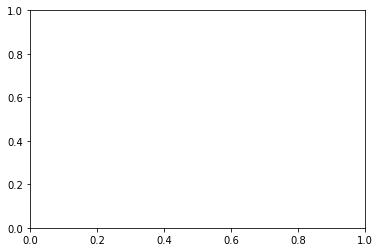

In [ ]:
def autolabel(rectangle_group):
	for rect in rectangle_group:
		height = rect.get_height()

		ax.annotate(str(height),
			xy = (rect.get_x() + rect.get_width() / 2,height),
			ha = 'center',
			xytext = (0,3),textcoords = 'offset points',
			color = 'grey')

phases      = ['Mid 90s','Early 2k','Mid 2k','Mid 2010s']
playstation = Avg_Online_list
xbox        = [0        , 24       , 86     , 50        ]
nintendo    = [33       , 22       , 102    , 62        ]
pc_sales    = [71       , 128      , 240    , 316       ]

width = 0.2
x_playstation = [x - width for x in range(len(playstation))]
x_xbox        = [x for x in range(len(xbox))]
x_nintendo = [x + width for x in range(len(nintendo))]

fig,ax = plt.subplots()

rect1 = ax.bar(x_playstation, playstation,width, label = 'Playstation',color = 'darkslategray')
rect2 = ax.bar(x_xbox,xbox,width,label = 'XBox',color = 'limegreen')
rect3 = ax.bar(x_nintendo,nintendo,width,label = 'Nintendo',color = 'crimson')
ax.plot(phases,pc_sales,label = 'PC Sales',color = 'black',marker = 'o')

ax.set_title('The hardware market')
ax.set_ylabel('Total sales (in millions)')
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.show()

In [ ]:
# def autolabel(rectangle_group):
# 	for rect in rectangle_group:
# 		height = rect.get_height()

# 		ax.annotate(str(height),
# 			xy = (rect.get_x() + rect.get_width() / 2,height),
# 			ha = 'center',
# 			xytext = (0,3),textcoords = 'offset points',
# 			color = 'grey')

# phases      = ['Mid 90s','Early 2k','Mid 2k','Mid 2010s']
# playstation = [102      , 155      , 87     , 110       ]
# xbox        = [0        , 24       , 86     , 50        ]
# nintendo    = [33       , 22       , 102    , 62        ]
# pc_sales    = [71       , 128      , 240    , 316       ]

# width = 0.2
# x_playstation = [x - width for x in range(len(playstation))]
# x_xbox        = [x for x in range(len(xbox))]
# x_nintendo = [x + width for x in range(len(nintendo))]

# fig,ax = plt.subplots()

# rect1 = ax.bar(x_playstation, playstation,width, label = 'Playstation',color = 'darkslategray')
# rect2 = ax.bar(x_xbox,xbox,width,label = 'XBox',color = 'limegreen')
# rect3 = ax.bar(x_nintendo,nintendo,width,label = 'Nintendo',color = 'crimson')
# ax.plot(phases,pc_sales,label = 'PC Sales',color = 'black',marker = 'o')

# ax.set_title('The hardware market')
# ax.set_ylabel('Total sales (in millions)')
# ax.legend()

# autolabel(rect1)
# autolabel(rect2)
# autolabel(rect3)

# plt.show()